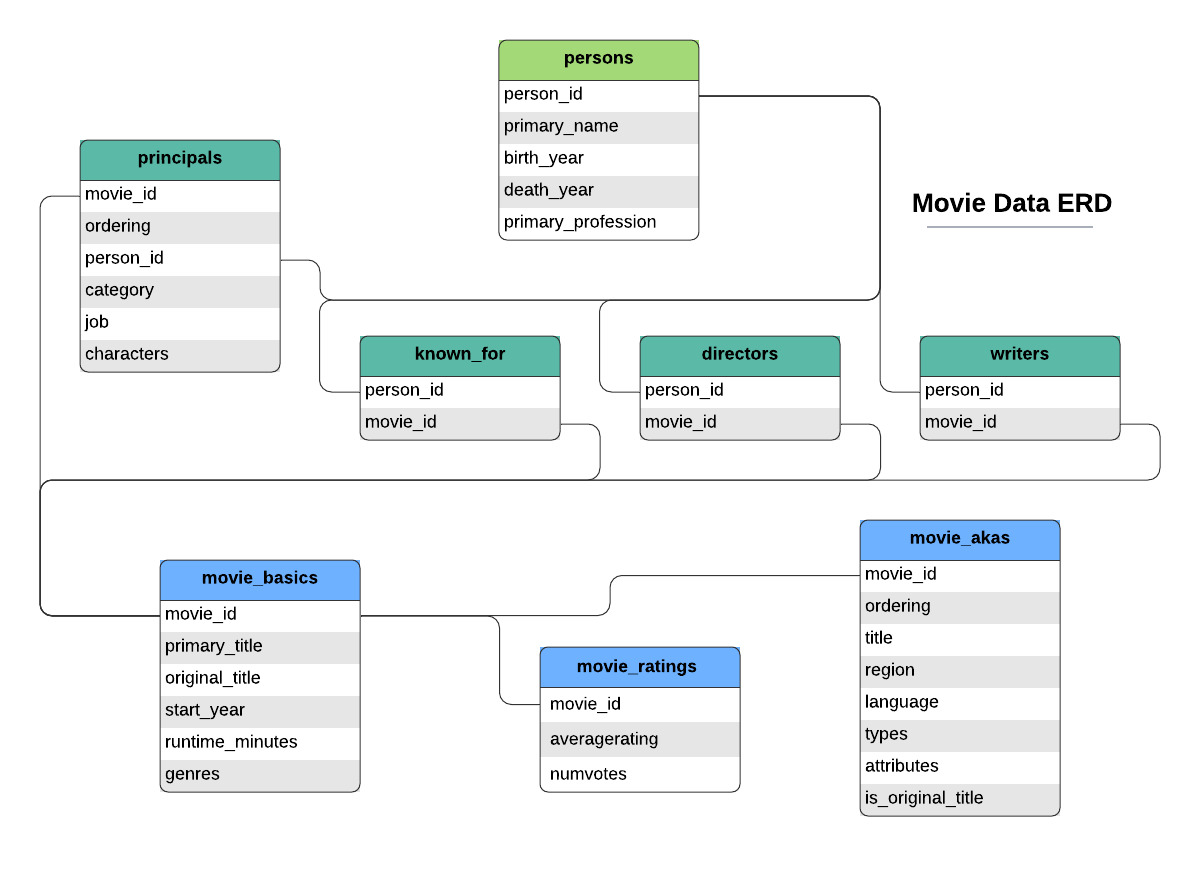

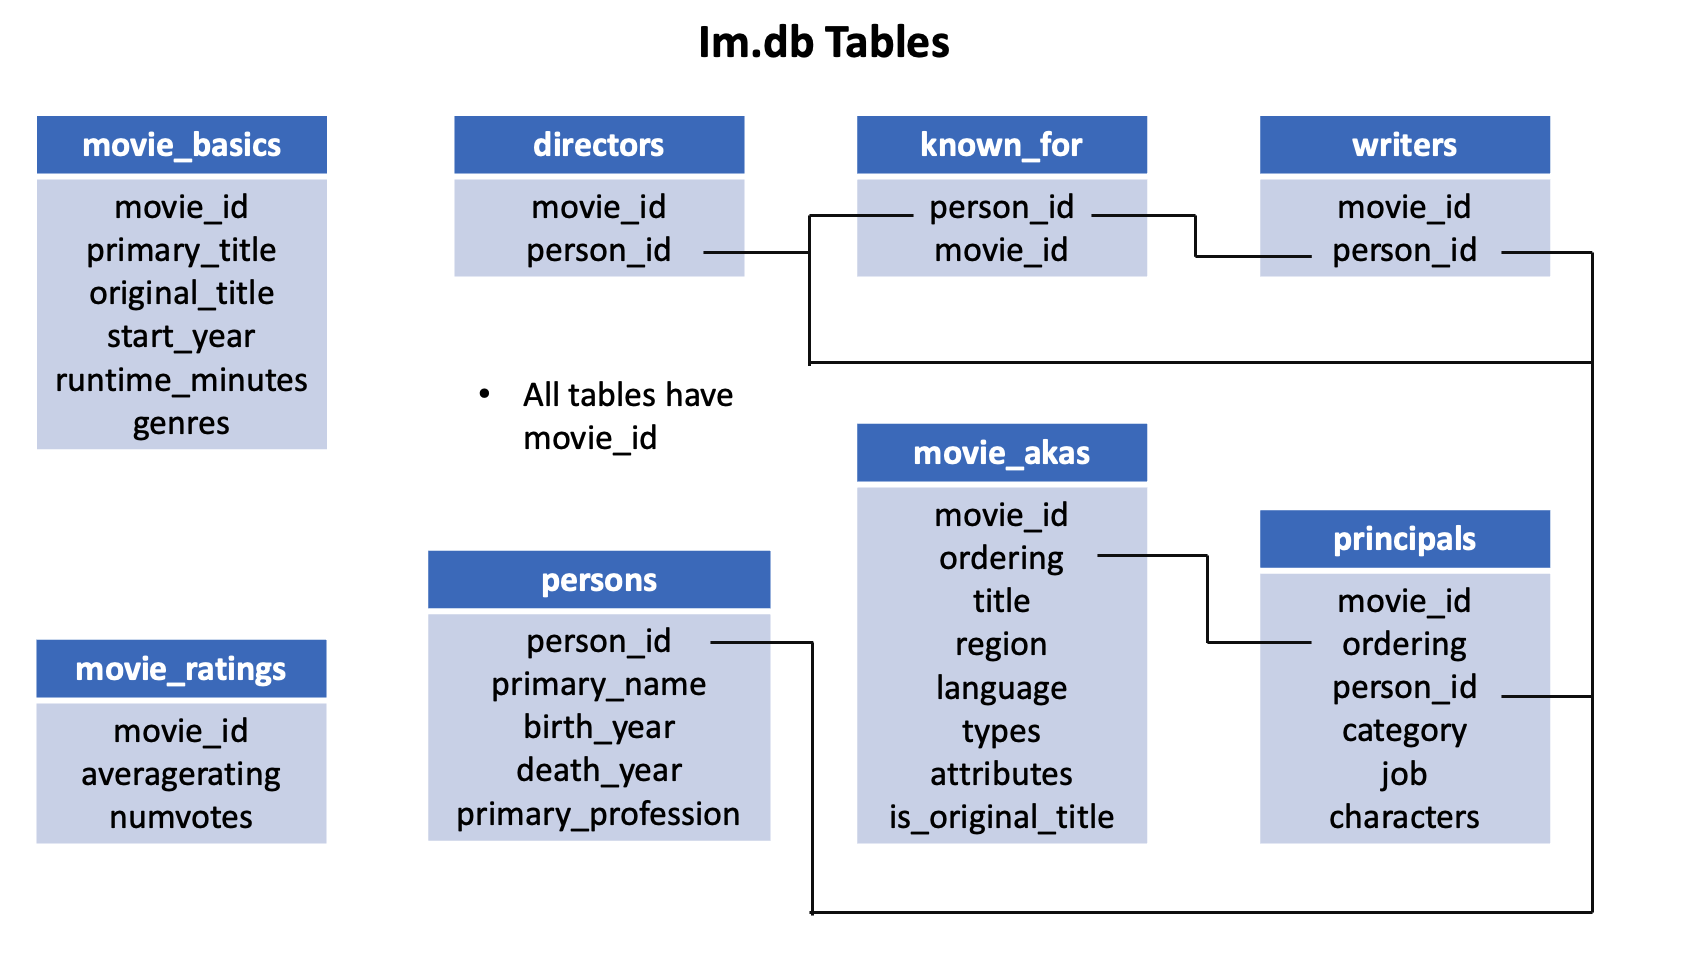

###Unzipping in google colab should alleviate runtime issues from working with a large database like `im.db`
I am following these instructions from [towardsdatascience.com](https://towardsdatascience.com/an-informative-colab-guide-to-load-image-datasets-from-github-kaggle-and-local-machine-75cae89ffa1e#:~:text=Once%20the%20dataset%20is%20saved,%2C%20then%20'Open'%20it.)

In [ ]:
import zipfile
import os

In [ ]:
zip_ref = zipfile.ZipFile('im.db.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
ls

bom.movie_gross.csv.gz  rt.reviews.tsv.gz   tn.movie_budgets.csv.gz
im.db.zip               sample_data/
rt.movie_info.tsv.gz    tmdb.movies.csv.gz


In [ ]:
len(os.listdir('/tmp/'))

10

In [ ]:
os.listdir('/tmp/')

['pyright-728-YRmDV6tYoGeV',
 'dap_multiplexer.1bbb266defb6.root.log.INFO.20230616-152944.84',
 'im.db',
 'language_service.1bbb266defb6.root.log.INFO.20230616-153212.720',
 'python-languageserver-cancellation',
 'pyright-728-1EPhjYtDsm0A',
 'debugger_2i4ac1jw9j',
 'dap_multiplexer.INFO',
 'initgoogle_syslog_dir.0',
 'language_service.INFO']

In [ ]:
import pandas as pd
import sqlite3

In [ ]:
conn = sqlite3.connect('/tmp/im.db')
cur = conn.cursor()

##Exploring the `movie_basics ` table

###Creating movie basics df to see something in Tableau

In [ ]:
df_movie_basics = pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    """, conn
)

In [ ]:
df_movie_basics.head(1)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


In [ ]:
df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
df_movie_basics.sort_values(by='start_year')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
9599,tt1566491,Brainiacs in La La Land,Brainiacs in La La Land,2010,NaN,Comedy
43264,tt2578092,Fireplace for your Home: Crackling Fireplace w...,Fireplace for your Home: Crackling Fireplace w...,2010,61.0,Music
11550,tt1634300,Role/Play,Role/Play,2010,85.0,"Drama,Romance"
11551,tt1634332,Johan1,Johan Primero,2010,78.0,"Comedy,Drama,Romance"
11552,tt1634334,Hands Up,Les mains en l'air,2010,90.0,Drama
...,...,...,...,...,...,...
2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,None
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"


##Previewing `movie_basics` Table with `sql`

In [ ]:
# previewing movie_basics table
pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    LIMIT 3
    """, conn
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [ ]:
# what is the earliest year from this table

pd.read_sql(
    """
    SELECT primary_title, MIN(start_year) AS earliest_movie_year
    FROM movie_basics
    LIMIT 1
    """, conn
)

,primary_title,earliest_movie_year
0,Pál Adrienn,2010


In [ ]:
# what is the most recent year from this table

pd.read_sql(
    """
    SELECT primary_title, MAX(start_year) AS latest_movie_year
    FROM movie_basics
    LIMIT 1
    """, conn
)

,primary_title,latest_movie_year
0,100 Years,2115


In [ ]:
# what are the 10 most recent movies (by year) from this table

pd.read_sql(
    """
    SELECT primary_title, start_year
    FROM movie_basics
    ORDER BY start_year DESC
    LIMIT 10
    """, conn
)

,primary_title,start_year
0,100 Years,2115
1,Avatar 5,2027
2,Untitled Star Wars Film,2026
3,Avatar 4,2025
4,Untitled Star Wars Film,2024
5,Fantastic Beasts and Where to Find Them 5,2024
6,Untitled Marvel Project,2023
7,Untitled Disney Live-Action Project,2023
8,Avatar 3,2023
9,Wraith of the Umbra and Eidolon II,2023


In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    WHERE primary_title = '100 Years'
    ORDER BY start_year DESC
    LIMIT 10
    """, conn
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt5174640,100 Years,100 Years,2115,NaN,Drama
1,tt3359730,100 Years,100 Years,2016,76.0,Documentary
2,tt1588853,100 Years,100 Years,2011,NaN,Documentary


###Did some joins (`movie_basics`, `movie_ratings`, `principals`) to answer questions about personnel. However, I did not get the information I was seek. Time to preview some more tables!

In [ ]:
pd.read_sql(
    """
    SELECT primary_title, start_year, genres, averagerating AS average_rating,job,characters
    FROM movie_basics
    JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    JOIN principals
    ON movie_basics.movie_id = principals.movie_id
    GROUP BY movie_basics.movie_id
    ORDER BY start_year DESC
    LIMIT 10
    """, conn
)

,primary_title,start_year,genres,average_rating,job,characters
0,Drømmeland,2019,Documentary,6.5,None,None
1,La vida sense la Sara Amat,2019,None,6.6,None,None
2,Sokagin Çocuklari,2019,"Drama,Family",8.7,None,None
3,Diabolik sono io,2019,Documentary,6.2,None,None
4,Swarm Season,2019,Documentary,6.2,None,None
5,Padmavyuhathile Abhimanyu,2019,Drama,8.4,None,None
6,Jeg ser deg,2019,"Crime,Documentary",6.1,None,None
7,Hayatta Olmaz,2019,Comedy,7.0,None,None
8,Unstoppable,2019,Documentary,8.1,None,None
9,July Kaatril,2019,Romance,9.0,None,None


##Previewing `directors` table

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM directors
    LIMIT 3
    """, conn
)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540


##Previewing `movie_ratings` table

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM movie_ratings
    LIMIT 3
    """, conn
)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


##Previewing `persons` table

Ahhh, note this one doesn't have the `movie_id` column!

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM persons
    LIMIT 3
    """, conn
)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,None,None,"miscellaneous,actor,writer"


##Previewing `movie_akas` table

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM movie_akas
    LIMIT 3
    """, conn
)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0


##Previewing `principals` table

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM principals
    LIMIT 3
    """, conn
)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None


##Previewing `writers` table

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM writers
    LIMIT 3
    """, conn
)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864


##Since `directors`, `writers`, and `known_for` only have ID's then there are other tables that must have the correlating values.

In [ ]:
# Does principals contain records on this writer?
# Are person ID's unique to the person or the project (film)?
pd.read_sql(
    """
    SELECT *
    FROM principals
    WHERE person_id = 'nm0899854'
    LIMIT 3
    """, conn
)

,movie_id,ordering,person_id,category,job,characters
0,tt0285252,5,nm0899854,director,None,None


**Interesting! This person is in the writers table AND is categorized as a director for the same movie ID in the principals table.**

Let's learn more about this movie...

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM principals
    WHERE movie_id	= 'tt0285252'
    LIMIT 10
    """, conn
)

,movie_id,ordering,person_id,category,job,characters
0,tt0285252,10,nm1077681,composer,None,None
1,tt0285252,1,nm0960950,actor,None,"[""Darren Fields""]"
2,tt0285252,2,nm0461311,actor,None,"[""RJ""]"
3,tt0285252,3,nm0000686,actor,None,"[""Roy Callahan""]"
4,tt0285252,4,nm0001822,actor,None,"[""Tom Wald""]"
5,tt0285252,5,nm0899854,director,None,None
6,tt0285252,6,nm0009272,producer,producer,None
7,tt0285252,7,nm0145874,producer,producer,None
8,tt0285252,8,nm0156342,producer,line producer,None
9,tt0285252,9,nm0120025,composer,None,None


I wonder how many records in the principals tables are associated with this movie!

In [ ]:
pd.read_sql(
    """
    SELECT COUNT(movie_id) AS num_principals
    FROM principals
    WHERE movie_id	= 'tt0285252'
    """, conn
)

,num_principals
0,10


Hmm ten principals, but none are the writer. **I want to know more about how writer data is represented in this database.**

Back to the writers table...

In [ ]:
pd.read_sql(
    """
    SELECT COUNT(DISTINCT person_id) AS num_distinct_writers
    FROM writers
    """, conn
)

,num_distinct_writers
0,122576


So we have 122,576 distinct writers. How many distinct movies are in the writers table?

In [ ]:
pd.read_sql(
    """
    SELECT COUNT(DISTINCT movie_id) AS num_distinct_movies
    FROM writers
    """, conn
)

,num_distinct_movies
0,110261


We have 110,261 distinct movies. This is interesting, but as movies can have multiple writers we need more information to see how many projects a writer is involved in and/or how many writers a movie has.

In [ ]:
#syntax reminder
SELECT column_name, COUNT(*)
FROM table_name
GROUP BY column_name;


In [ ]:
pd.read_sql(
    """
    SELECT movie_id, COUNT(*) as num_writers_per_movie
    FROM writers
    GROUP BY movie_id;
    """, conn
)

,movie_id,num_writers_per_movie
0,tt0063540,4
1,tt0069049,2
2,tt0069204,1
3,tt0100275,4
4,tt0111414,1
...,...,...
110256,tt9916538,3
110257,tt9916622,4
110258,tt9916706,1
110259,tt9916730,1


What movies have the most writers?

In [ ]:
pd.read_sql(
    """
    SELECT movie_id, COUNT(*) AS num_writers_per_movie
    FROM writers
    GROUP BY movie_id
    ORDER BY num_writers_per_movie DESC
    LIMIT 10;
    """, conn
)

,movie_id,num_writers_per_movie
0,tt4050462,3818
1,tt3091166,2397
2,tt2249786,2392
3,tt4942694,2013
4,tt3528906,1770
5,tt4490348,1720
6,tt2575290,1560
7,tt2926810,1023
8,tt5141260,861
9,tt1609150,702


WHOA! Really??? I want to know more about this movie with almost 4K writers!

It is a compliation of short horror films so that could account for more writers but WHOA!

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    WHERE movie_id = 'tt4050462'
    """, conn
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt4050462,World of Death,World of Death,2016,142.0,"Comedy,Horror,Sci-Fi"


The movie with the second most writers is a fan remake.

*Can we filter out these fan remakes and compliations?*

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    WHERE movie_id = 'tt3091166'
    """, conn
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt3091166,Our Footloose Remake,Our Footloose Remake,2011,98.0,"Comedy,Drama,Music"


I want to know what the average number of writers is, but I want to find a way to exclude fan remakes and compliations first!

##Taking a closer look at the `persons` table

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM persons
    LIMIT 10;
    """, conn
)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,None,"production_designer,art_department,set_decorator"
5,nm0062879,Ruel S. Bayani,NaN,None,"director,production_manager,miscellaneous"
6,nm0063198,Bayou,NaN,None,actor
7,nm0063432,Stevie Be-Zet,NaN,None,"composer,soundtrack"
8,nm0063618,Jeff Beal,1963.0,None,"composer,music_department,soundtrack"
9,nm0063750,Lindsay Beamish,NaN,None,"actress,miscellaneous"


Seeing some NaN values in the `birth_year`. Makes me wonder re: the reliability of the `death_year` column.

Not everyone is dead, but everyone was born!

In [ ]:
pd.read_sql(
    """
    SELECT COUNT(*) AS nan_birth_year_count
    FROM persons
    WHERE birth_year IS NULL
    """, conn
)


,nan_birth_year_count
0,523912


That is a lot of missing values! How many are not null?

In [ ]:
pd.read_sql(
    """
    SELECT COUNT(*) AS birth_year_count
    FROM persons
    WHERE birth_year IS NOT NULL
    """, conn
)

,birth_year_count
0,82736


More missing than not! Now I question the reliability of the death year column. We may need another way to exclude deceased personnel.

How many different primary professions are there?

In [ ]:
pd.read_sql(
    """
    SELECT COUNT(DISTINCT primary_profession) AS num_distinct_professions
    FROM persons;
    """, conn
)

,num_distinct_professions
0,8647


####**Maybe to do:** Since `primary_professions` contains some lists, it might be worth separating into columns like profession_1, profession_2, etc. That's too many distinct professions!

##Taking a closer look at `movie_akas` to learn about countries and regions

First a preview to refresh my mind:

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM movie_akas
    LIMIT 3;
    """, conn
)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0


Looks like we have the same movie in different languages! Let's take a closer look:

Figuring out what is up with `XWW` and `XWG` regions...

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM movie_akas
    WHERE region = 'XWW'
    LIMIT 10
    """, conn
)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,23,Jurassic World 3D,XWW,None,None,3-D version,0.0
1,tt10027708,2,Miguelito,XWW,en,imdbDisplay,None,0.0
2,tt10225354,3,Returning Home,XWW,en,alternative,None,0.0
3,tt10225420,2,The Universe in Which I Loved You,XWW,en,imdbDisplay,None,0.0
4,tt10308634,3,Young Clients,XWW,en,alternative,None,0.0
5,tt10351180,3,Bad Boy,XWW,None,None,alternative spelling,0.0
6,tt1182315,2,Black Buenos Aires,XWW,en,imdbDisplay,None,0.0
7,tt1259520,6,Bon appétit,XWW,None,imdbDisplay,None,0.0
8,tt1263750,19,Room in Rome,XWW,en,imdbDisplay,None,0.0
9,tt1272051,5,Space Dogs 3D,XWW,en,None,None,0.0


In [ ]:
pd.read_sql(
    """
    SELECT COUNT(region) as XWW_count
    FROM movie_akas
    WHERE region = 'XWW'
    """, conn
)

,XWW_count
0,18467


In [ ]:
pd.read_sql(
    """
    SELECT title, region, movie_id
    FROM movie_akas
    WHERE region = 'XWW'
    GROUP BY movie_id
    LIMIT 10;
    """, conn
)

,title,region,movie_id
0,One Day Before the Rainy Season,XWW,tt0066787
1,The Wandering Soap Opera,XWW,tt0100275
2,So Much for Justice!,XWW,tt0154039
3,Children of the Green Dragon,XWW,tt0162942
4,The Tragedy of Man,XWW,tt0176694
5,Babylon Revisited,XWW,tt0255820
6,Journey of Akaki,XWW,tt0262218
7,Seven Jews from My Class,XWW,tt0262759
8,Prague: The Restless Heart of Europe,XWW,tt0277964
9,Short Time Heroes,XWW,tt0283440


In [ ]:
pd.read_sql(
    """
    SELECT DISTINCT movie_id, title, region, language
    FROM movie_akas
    WHERE region = 'XWW'
    GROUP BY movie_id
    LIMIT 10;
    """, conn
)

,movie_id,title,region,language
0,tt0066787,One Day Before the Rainy Season,XWW,en
1,tt0100275,The Wandering Soap Opera,XWW,en
2,tt0154039,So Much for Justice!,XWW,en
3,tt0162942,Children of the Green Dragon,XWW,en
4,tt0176694,The Tragedy of Man,XWW,en
5,tt0255820,Babylon Revisited,XWW,en
6,tt0262218,Journey of Akaki,XWW,en
7,tt0262759,Seven Jews from My Class,XWW,en
8,tt0277964,Prague: The Restless Heart of Europe,XWW,en
9,tt0283440,Short Time Heroes,XWW,en


In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    WHERE movie_id = 'tt0066787'
    LIMIT 10;
    """, conn
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [ ]:
pd.read_sql(
    """
    SELECT COUNT(DISTINCT movie_id) AS num_xww_movies
    FROM movie_akas
    WHERE region = 'XWW';
    """, conn
)

,num_xww_movies
0,16811


In [ ]:
pd.read_sql(
    """
    SELECT movie_id, title, region, language
    FROM movie_akas
    WHERE region = 'XWW'
    GROUP BY movie_id
    LIMIT 10;
    """, conn
)

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM movie_akas
    WHERE region = 'XWG'
    LIMIT 10
    """, conn
)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt4195444,3,Die Liebe eines Fischers,XWG,None,None,poster title,0.0
1,tt3728480,3,St. Pauli Zoo: Ein Stadtteil im Wandel,XWG,None,None,complete title,0.0


###Maybe to do: We see below there are 47 different versions of Jurassic Park. Perhaps the best use of the `movie_akas` table would be to join with `movie_basics `and add region + language, keeping one record for each movie in its original title.

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM movie_akas
    WHERE movie_id = 'tt0369610'
    """, conn
)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


Counting regions (including: null, not null, distinct)

In [ ]:
pd.read_sql(
    """
    SELECT COUNT(*) AS nan_region_count
    FROM movie_akas
    WHERE region IS NULL
    """, conn
)

,nan_region_count
0,53293


In [ ]:
pd.read_sql(
    """
    SELECT COUNT(*) AS region_count
    FROM movie_akas
    WHERE region IS NOT NULL
    """, conn
)

,region_count
0,278410


In [ ]:
pd.read_sql(
    """
    SELECT COUNT(DISTINCT region) AS num_distinct_regions
    FROM movie_akas;
    """, conn
)

,num_distinct_regions
0,213


Counting languages (including: null, not null, distinct)

In [ ]:
pd.read_sql(
    """
    SELECT COUNT(*) AS nan_language_count
    FROM movie_akas
    WHERE language IS NULL
    """, conn
)

,nan_language_count
0,289988


In [ ]:
pd.read_sql(
    """
    SELECT COUNT(*) AS language_count
    FROM movie_akas
    WHERE language IS NOT NULL
    """, conn
)

,language_count
0,41715


In [ ]:
pd.read_sql(
    """
    SELECT COUNT(DISTINCT language) AS num_distinct_languages
    FROM movie_akas;
    """, conn
)

,num_distinct_languages
0,76


Note to self: I want to know what languages are represented here.

##Taking a closer look at `movie_ratings`

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM movie_ratings
    LIMIT 3;
    """, conn
)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [ ]:
pd.read_sql(
    """
    SELECT COUNT(*) AS num_movies_rated
    FROM movie_ratings;
    """, conn
)

,num_movies_rated
0,73856


In [ ]:
# sanity check for unique movies

pd.read_sql(
    """
    SELECT COUNT(DISTINCT movie_id) AS num_distinct_movies_rated
    FROM movie_ratings;
    """, conn
)

,num_distinct_movies_rated
0,73856


Cool, we have confirmed there are no dupes as the record count = the distinct movie_id count.

Now let's do some sorting and filtering!

In [ ]:
# Movie with the most votes
pd.read_sql(
    """
    SELECT movie_id,averagerating, MAX(numvotes) AS votes
    FROM movie_ratings;
    """, conn
)

,movie_id,averagerating,votes
0,tt1375666,8.8,1841066


What movie is this one with the most votes?

In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    WHERE movie_id = 'tt1375666';
    """, conn
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"


###Inception is incredibly popular so that makese sense! I think we should sort by numvotes rather than average rating as a unit of measure for success.

What are the movies with the top ten votes?

In [ ]:
pd.read_sql(
    """
    SELECT  movie_basics.movie_id, original_title, start_year, runtime_minutes, genres, averagerating, numvotes
    FROM movie_basics
    JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    ORDER BY numvotes DESC
    LIMIT 10;
    """, conn
)

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
2,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
4,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
5,tt0993846,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358
6,tt1130884,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960
7,tt2015381,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394
8,tt1431045,Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847
9,tt1392170,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227


In [ ]:
# Movie with the least votes
pd.read_sql(
    """
    SELECT movie_id,	averagerating, MIN(numvotes) AS votes
    FROM movie_ratings;
    """, conn
)

,movie_id,averagerating,votes
0,tt1193623,8.0,5


What are the ten movies with the least votes?

In [ ]:
pd.read_sql(
    """
    SELECT  movie_basics.movie_id, original_title, start_year, runtime_minutes, genres, averagerating, numvotes
    FROM movie_basics
    JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    ORDER BY numvotes ASC
    LIMIT 10;
    """, conn
)

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0276568,To Chase a Million,2018,97.0,"Action,Drama",7.4,5
1,tt0844699,Ivan Mosjoukine ou L'enfant du carnaval,2016,67.0,Documentary,9.0,5
2,tt10009602,Meu Nome é Daniel,2018,82.0,Documentary,8.0,5
3,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,2019,52.0,Documentary,7.0,5
4,tt10011252,Watson,2019,NaN,Documentary,6.0,5
5,tt10011296,Nomad: In the Footsteps of Bruce Chatwin,2019,NaN,Documentary,8.0,5
6,tt10011772,Balloons over Babylon,2019,70.0,Documentary,8.2,5
7,tt10026172,Between Me and My Mind,2019,NaN,Documentary,8.8,5
8,tt10043732,Oblepikhovoe leto,2018,87.0,"Biography,Drama",6.4,5
9,tt10044934,Bumi Itu Bulat,2019,103.0,Drama,6.6,5


##Exploring movies by runtimes

In [ ]:
pd.read_sql(
    """
    SELECT  movie_basics.movie_id, original_title, start_year, runtime_minutes, genres, averagerating, numvotes
    FROM movie_basics
    JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    ORDER BY runtime_minutes ASC
    LIMIT 5;
    """, conn
)

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0069204,Sabse Bada Sukh,2018,None,"Comedy,Drama",6.1,13
1,tt0112502,Bigfoot,2017,None,"Horror,Thriller",4.1,32
2,tt0250404,Godfather,2012,None,"Crime,Drama",6.7,236
3,tt0263814,On kadin,2019,None,Drama,7.1,100
4,tt0285423,Abolição,2019,None,Documentary,7.4,35


OOF some "None" in minutes. Annoying! We can probably drop those. Let's see how many there are...

In [ ]:
pd.read_sql(
    """
    SELECT COUNT(*) AS num_movies_no_runtime
    FROM movie_basics
    WHERE runtime_minutes	IS NULL;
    """, conn
)

,num_movies_no_runtime
0,31739


I am guessing these are not very popular anyhow. Let's see how many votes on average a movie with no runtime gets...

In [ ]:
# First a peak at the 10 lest popular movies with no runtime
pd.read_sql(
    """
    SELECT  movie_basics.movie_id, original_title, start_year, runtime_minutes, genres, averagerating, numvotes
    FROM movie_basics
    JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    WHERE runtime_minutes	IS NULL
    ORDER BY numvotes ASC
    LIMIT 10;
    """, conn
)

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10011252,Watson,2019,None,Documentary,6.0,5
1,tt10011296,Nomad: In the Footsteps of Bruce Chatwin,2019,None,Documentary,8.0,5
2,tt10026172,Between Me and My Mind,2019,None,Documentary,8.8,5
3,tt10045072,Billich: Beyond The Canvas,2019,None,Documentary,6.4,5
4,tt10064448,Because We Are Girls,2019,None,Documentary,9.0,5
5,tt10122528,Miel-Emile,2019,None,None,8.2,5
6,tt10177712,"Alexis Viera, una historia de superación",2019,None,Documentary,7.6,5
7,tt10208192,Que Sea Ley,2019,None,Documentary,5.6,5
8,tt10276578,Lost Treasures of the Maya Snake Kings,2018,None,Documentary,6.6,5
9,tt1193623,Buried Prayers,2010,None,Documentary,8.0,5


Only 43 votes on average. I think we can safely drop these!

In [ ]:
pd.read_sql(
    """
    SELECT  AVG(numvotes) AS average_votes_no_run
    FROM movie_basics
    JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    WHERE runtime_minutes	IS NULL;
    """, conn
)

,average_votes_no_run
0,43.027822


What are the shortest films, excluding the no runtimes?

In [ ]:
pd.read_sql(
    """
    SELECT  movie_basics.movie_id, original_title, start_year, runtime_minutes, genres, averagerating, numvotes
    FROM movie_basics
    JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    WHERE runtime_minutes	IS NOT NULL
    ORDER BY runtime_minutes ASC
    LIMIT 10;
    """, conn
)

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt2258391,Hermeneutics,2012,3.0,"Documentary,History,War",6.2,8
1,tt4597838,Limitless,2015,3.0,"Biography,Documentary",6.7,10
2,tt7379378,I Heart NY,2017,3.0,"Biography,Documentary",7.8,5
3,tt5884852,Donald Trump courageously stands up to Bill Cl...,2016,4.0,Documentary,4.3,6
4,tt7349926,The Coffin Club,2017,4.0,"Documentary,Musical",9.4,5
5,tt2268982,USA From A Room,2012,5.0,"Documentary,Drama",8.4,11
6,tt2923554,Jumper,2013,5.0,"Biography,Documentary,Drama",8.0,5
7,tt4326858,Bombay 70,2015,5.0,"Comedy,Documentary,Drama",7.4,16
8,tt5811420,Oddball,2016,5.0,Documentary,6.4,5
9,tt6088732,The Aria of Babyface Cauliflower Brown,2017,5.0,"Documentary,Sport",9.3,6


What are the longest movies?

In [ ]:
pd.read_sql(
    """
    SELECT  movie_basics.movie_id, original_title, start_year, runtime_minutes, genres, averagerating, numvotes
    FROM movie_basics
    JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    WHERE runtime_minutes	IS NOT NULL
    ORDER BY runtime_minutes DESC
    LIMIT 10;
    """, conn
)

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt8273150,Logistics,2012,51420.0,Documentary,5.0,17
1,tt2659636,Modern Times Forever,2011,14400.0,Documentary,6.2,69
2,tt2008009,The Clock,2010,1440.0,Drama,8.9,219
3,tt8677246,Bullfighting Memories,2017,1100.0,"Comedy,History",8.6,5
4,tt9047474,La flor,2018,808.0,"Drama,Fantasy,Musical",8.5,100
5,tt7528992,Europa: The Last Battle,2017,746.0,Documentary,8.2,162
6,tt2261469,Double Fine Adventure,2015,724.0,Documentary,8.5,59
7,tt5374716,Chamissos Schatten,2016,720.0,Documentary,7.8,19
8,tt5375100,Paint Drying,2016,607.0,Documentary,9.3,218
9,tt8690764,"Silence not silence, red not red, live not live",2018,601.0,Drama,8.6,22


Well, it looks like long movies are not very popular either. So filtering by popularity might take care of these extremes anyhow!

##Exploring popularity by genre

IMDB allows up to 3 genres. I think it would be helpful to split into 3 columns like:

`main_genre`, `subgenre_1`, `subgenre_2`

In [ ]:
pd.read_sql(
    """
    SELECT COUNT(DISTINCT genres) AS distinct_genres
    FROM movie_basics;
    """, conn
)

,distinct_genres
0,1085


First, I want to create my dataframe.

In [ ]:
df = pd.read_sql(
    """
    SELECT  movie_basics.movie_id, original_title, start_year, runtime_minutes, genres, averagerating, numvotes
    FROM movie_basics
    JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    WHERE runtime_minutes	IS NOT NULL;
    """, conn
)

And now my new columns

In [ ]:
df[['main_genre', 'subgenre_1', 'subgenre_2']] = df['genres'].str.split(',', expand=True)

Previewing the dataframe.

In [ ]:
df.head(3)

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,main_genre,subgenre_1,subgenre_2
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography,Drama,None
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Drama,None,None


In [ ]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,66236.000000,66236.000000,66236.000000,6.623600e+04
mean,2014.252687,94.654040,6.321925,3.924085e+03
std,2.600352,208.574111,1.458443,3.196486e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.100000e+01
75%,2016.000000,104.000000,7.300000,3.470000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66236 entries, 0 to 66235
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   original_title   66236 non-null  object 
 2   start_year       66236 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           65720 non-null  object 
 5   averagerating    66236 non-null  float64
 6   numvotes         66236 non-null  int64  
 7   main_genre       65720 non-null  object 
 8   subgenre_1       34877 non-null  object 
 9   subgenre_2       17840 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 5.1+ MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/df.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

Mounted at /content/drive


Where are my years!

In [ ]:
df2 = pd.read_sql(
    """
    SELECT  movie_basics.movie_id, original_title, start_year, runtime_minutes, genres, averagerating, numvotes
    FROM movie_basics
    JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    WHERE runtime_minutes	IS NOT NULL;
    """, conn
)

In [ ]:
pd.read_sql(
    """
    SELECT  movie_basics.movie_id, original_title, start_year, runtime_minutes, genres, averagerating, numvotes
    FROM movie_basics
    JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    WHERE runtime_minutes	IS NOT NULL
    GROUP BY movie_basics.movie_id
    ORDER BY start_year DESC
    LIMIT 10;
    """, conn
)

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt9916160,Drømmeland,2019,72.0,Documentary,6.5,11
1,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
2,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
3,tt9913056,Swarm Season,2019,86.0,Documentary,6.2,5
4,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
5,tt9910930,Jeg ser deg,2019,75.0,"Crime,Documentary",6.1,7
6,tt9910502,Hayatta Olmaz,2019,97.0,Comedy,7.0,9
7,tt9906218,Unstoppable,2019,84.0,Documentary,8.1,8
8,tt9905476,Hand Rolled,2019,90.0,Documentary,9.3,13
9,tt9905462,Pengalila,2019,111.0,Drama,8.4,600


In [ ]:
pd.read_sql(
    """
    SELECT *
    FROM  movie_ratings
    ORDER BY numvotes DESC
    LIMIT 10;
    """, conn
)

,movie_id,averagerating,numvotes
0,tt1375666,8.8,1841066
1,tt1345836,8.4,1387769
2,tt0816692,8.6,1299334
3,tt1853728,8.4,1211405
4,tt0848228,8.1,1183655
5,tt0993846,8.2,1035358
6,tt1130884,8.1,1005960
7,tt2015381,8.1,948394
8,tt1431045,8.0,820847
9,tt1392170,7.2,795227


_____